In [1]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# View shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Overview of dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [4]:
# Label encode the target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [5]:
# Get all object (text) columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", list(categorical_cols))

Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [6]:
# One-hot encode all remaining categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [7]:
# Confirm all columns are now numeric
df_encoded.info()

# Preview the encoded dataset
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,1,2,3,61,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,1,4,4,92,2,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,1,5,4,56,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,7,1,40,3,...,True,False,False,False,False,False,False,True,False,False


In [8]:
# Check correlation with 'Attrition'
corr = df_encoded.corr()['Attrition'].sort_values(ascending=False)
print(corr)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

<ipython-input-9-9e38d110ffad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")


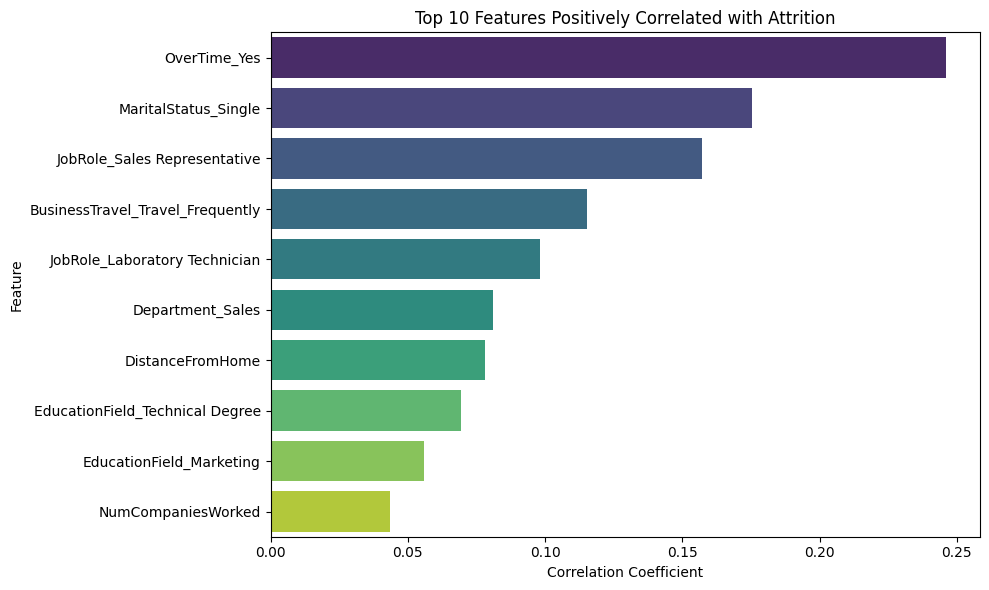

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop Attrition itself and get top correlations
top_corr_features = corr.drop('Attrition').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")
plt.title("Top 10 Features Positively Correlated with Attrition")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

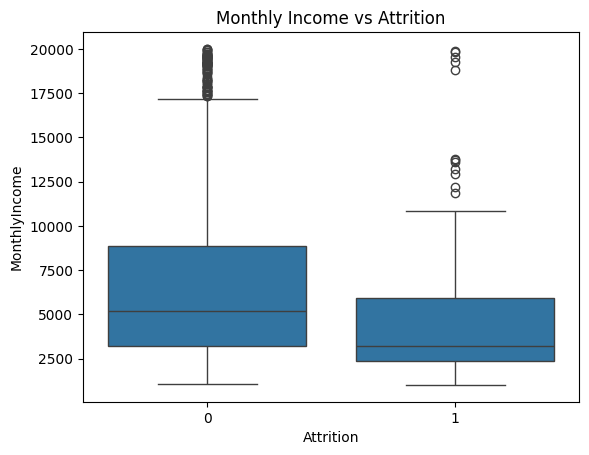

In [10]:
# Example: MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

In [11]:
# Define X and y
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [12]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predict
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Define a function for evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# Evaluate both
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Decision Tree Results:
Accuracy: 0.7755102040816326
Precision: 0.17073170731707318
Recall: 0.1794871794871795
F1 Score: 0.175

Random Forest Results:
Accuracy: 0.8775510204081632
Precision: 0.8
Recall: 0.10256410256410256
F1 Score: 0.18181818181818182


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

<ipython-input-16-d6fcb16262f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette="coolwarm")


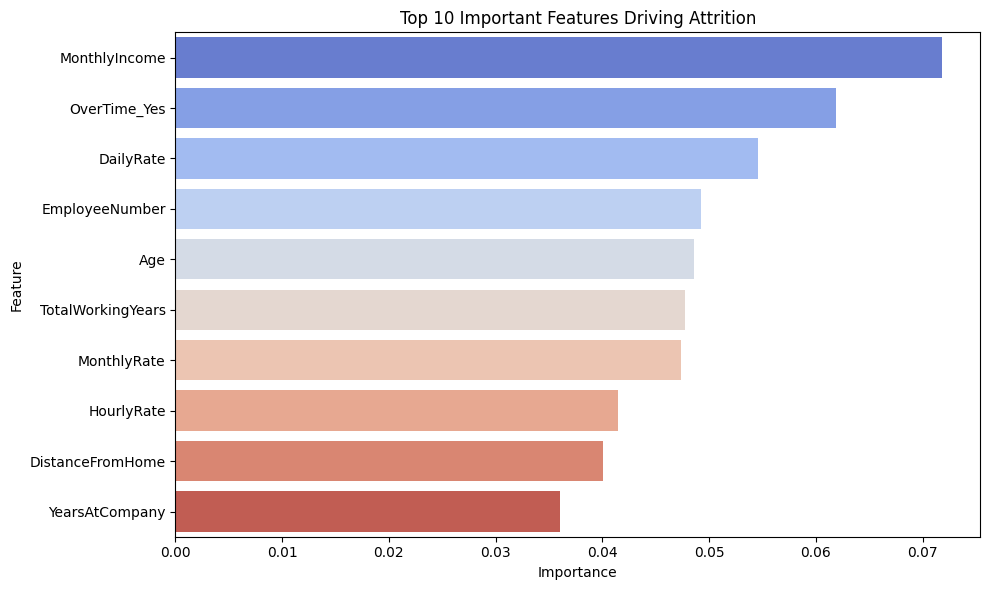

In [16]:
# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette="coolwarm")
plt.title('Top 10 Important Features Driving Attrition')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

# Initialize models
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Voting classifier (ensemble of top models)
voting_clf = VotingClassifier(estimators=[
    ('lr', lr), ('knn', knn), ('rf', rf), ('gb', gb), ('xgb', xgb_model)
], voting='soft')

In [18]:
models = {
    "Logistic Regression": lr,
    "K-Nearest Neighbors": knn,
    "Gradient Boosting": gb,
    "XGBoost": xgb_model,
    "Voting Classifier": voting_clf
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.8673469387755102
Precision: 0.5
Recall: 0.1794871794871795
F1 Score: 0.2641509433962264

K-Nearest Neighbors
Accuracy: 0.8537414965986394
Precision: 0.35714285714285715
Recall: 0.1282051282051282
F1 Score: 0.18867924528301888

Gradient Boosting
Accuracy: 0.8775510204081632
Precision: 0.6
Recall: 0.23076923076923078
F1 Score: 0.3333333333333333


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.8707482993197279
Precision: 0.5263157894736842
Recall: 0.2564102564102564
F1 Score: 0.3448275862068966


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Voting Classifier
Accuracy: 0.8877551020408163
Precision: 1.0
Recall: 0.15384615384615385
F1 Score: 0.26666666666666666


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:24:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [20]:
# Create base model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define search space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [21]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,            # You can increase this for better results
    scoring='accuracy',   # You can use 'f1' if recall is your focus
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run the search
random_search.fit(X_train, y_train)

# Best estimator
best_xgb = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict
y_pred = best_xgb.predict(X_test)

# Evaluation
print("Tuned XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Tuned XGBoost Results:
Accuracy: 0.8775510204081632
Precision: 0.5789473684210527
Recall: 0.28205128205128205
F1 Score: 0.3793103448275862


In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Re-initialize base models with same settings as before
lr = LogisticRegression(max_iter=1000)
gb = GradientBoostingClassifier(random_state=42)

# Use the best XGBoost model from tuning
xgb_tuned = best_xgb

In [25]:
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('gb', gb),
        ('xgb', xgb_tuned)
    ],
    voting='soft',  # Use soft voting for better probability averaging
    n_jobs=-1
)

In [26]:
# Train the ensemble model
voting_model.fit(X_train, y_train)

# Predict
y_pred = voting_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Voting Classifier (Ensemble) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Voting Classifier (Ensemble) Results:
Accuracy: 0.8945578231292517
Precision: 0.9
Recall: 0.23076923076923078
F1 Score: 0.3673469387755102


In [27]:
import joblib

# Save the ensemble model
joblib.dump(voting_model, 'ensemble_attrition_model.pkl')

['ensemble_attrition_model.pkl']

In [28]:
# Save the list of column names used for prediction
feature_list = list(X.columns)
joblib.dump(feature_list, 'model_features.pkl')

['model_features.pkl']